In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import pandas as pd
df_cust = pd.read_csv('BGCON_CUST_DATA.csv', encoding = 'utf-8', dtype={'RESI_TYPE_CODE':str})

<AxesSubplot:>

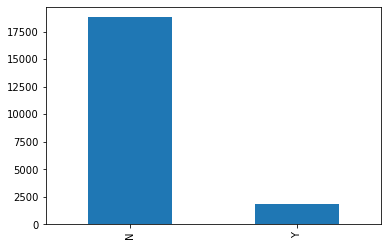

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df_cust['SIU_CUST_YN'].value_counts().plot(ax=ax, kind='bar')
#사기여부. 사기가 아닌 경우가 많음. 불균형 데이터.

<AxesSubplot:>

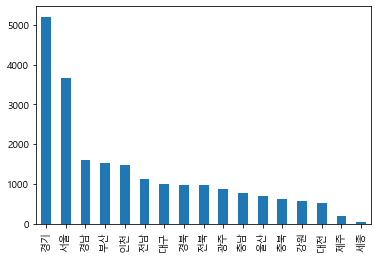

In [3]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
fig, ax = plt.subplots()
df_cust['CTPR'].value_counts().plot(ax=ax, kind='bar')

In [4]:
df_cust.describe()

,CUST_ID,DIVIDED_SET,SEX,AGE,RESI_COST,CUST_RGST,TOTALPREM,MINCRDT,MAXCRDT,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
count,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,21944.000000,1.660900e+04,12924.000000,12924.000000,21927.000000,21927.000000,15914.000000,1.591400e+04,17137.000000,22400.000000,21720.000000
mean,11200.500000,1.080045,1.565134,44.734866,15914.413973,198924.250638,2.998266e+07,5.838904,19.480656,0.709491,8.603731,200881.825437,4.807763e+05,2704.184863,4768.733884,5198.238950
std,6466.467351,0.271368,0.495750,15.445707,14963.317519,16989.329112,4.897438e+07,3.515198,32.363151,0.953671,11.585592,522.266749,1.327265e+06,2188.208641,3072.385280,2714.947843
min,1.000000,1.000000,1.000000,2.000000,0.000000,101.000000,5.000000e+02,0.000000,0.000000,0.000000,0.000000,199801.000000,6.000000e+00,0.000000,0.000000,0.000000
25%,5600.750000,1.000000,1.000000,34.000000,6732.750000,200306.000000,6.665459e+06,6.000000,6.000000,0.000000,0.000000,200404.000000,1.129440e+05,0.000000,2995.000000,3557.750000
50%,11200.500000,1.000000,2.000000,46.000000,12222.000000,200306.000000,1.622463e+07,6.000000,6.000000,0.000000,0.000000,200901.000000,2.265920e+05,3432.000000,4807.000000,4681.000000
75%,16800.250000,1.000000,2.000000,56.000000,20988.000000,200402.000000,3.479439e+07,6.000000,7.000000,1.000000,19.000000,201402.000000,4.852868e+05,4398.000000,6607.250000,6839.500000
max,22400.000000,2.000000,2.000000,89.000000,305555.000000,201602.000000,1.840052e+09,99.000000,99.000000,6.000000,35.000000,207110.000000,5.686262e+07,12687.000000,19829.000000,25872.000000


C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


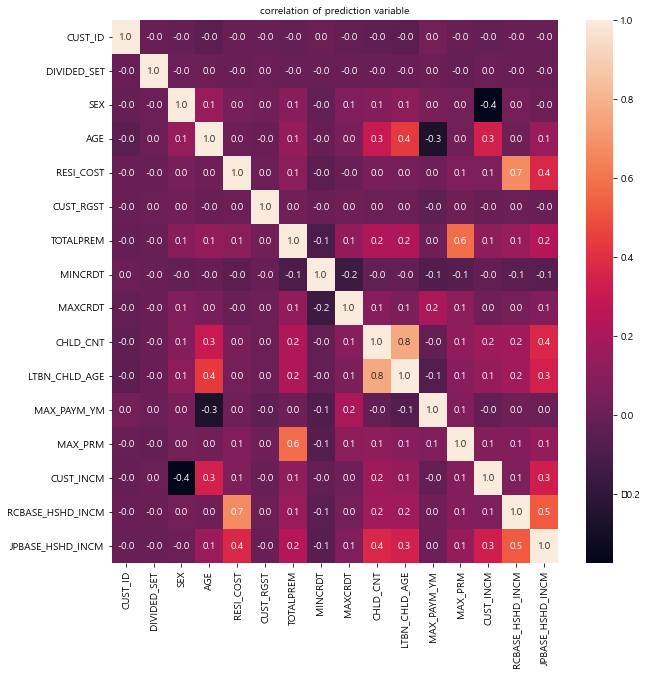

In [5]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(df_cust.corr(), annot=True, fmt='.1f')
plt.title('correlation of prediction variable', fontsize=10)
plt.show()

In [3]:
# 범주형 변수에서 결측을 하나의 범주로 인정한다.
df_cust.fillna({'CTPR':'None'}, inplace=True)
df_cust.fillna({'OCCP_GRP_1':'None'}, inplace=True)
df_cust.fillna({'WEDD_YN':'None'}, inplace=True)

df_cust = df_cust[df_cust['SIU_CUST_YN'].notna()] # SIU_CUST_YN 이 없는 레코드 제외

In [4]:
df_cust_yes = df_cust[df_cust['SIU_CUST_YN']=='Y']
df_cust_no = df_cust[df_cust['SIU_CUST_YN']=='N']

In [59]:
df_cust

,CUST_ID,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,...,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,N,2,47,21111,20,N,199910.0,충북,3.사무직,...,146980441.0,NaN,NaN,Y,3.사무직,2차산업 종사자,2.0,4879.0,10094,11337.0
1,2,N,1,53,40000,20,N,199910.0,서울,3.사무직,...,94600109.0,1.0,6.0,Y,1.주부,주부,2.0,6509.0,9143,6509.0
2,3,N,1,60,0,NaN,N,199910.0,서울,5.서비스,...,18501269.0,NaN,NaN,N,NaN,NaN,0.0,4180.0,0,4180.0
3,4,N,2,64,12861,40,Y,199910.0,경기,2.자영업,...,317223657.0,2.0,99.0,N,NaN,NaN,0.0,NaN,4270,5914.0
4,5,N,2,54,0,NaN,Y,199910.0,광주,2.자영업,...,10506072.0,8.0,8.0,Y,3.사무직,고위 공무원,3.0,3894.0,0,8885.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22394,875,Y,1,49,0,NaN,N,200306.0,경남,5.서비스,...,NaN,NaN,NaN,Y,3.사무직,3차산업 종사자,2.0,5090.0,0,8373.0
22396,21483,N,2,30,31944,20,N,200306.0,경기,1.주부,...,NaN,NaN,NaN,N,NaN,NaN,0.0,0.0,9361,8947.0
22397,21940,N,2,23,45972,20,N,200501.0,경기,8.기타,...,NaN,6.0,6.0,N,NaN,NaN,0.0,0.0,11522,11484.0
22398,20356,N,1,15,27777,20,N,200306.0,경기,8.기타,...,NaN,NaN,NaN,N,NaN,NaN,0.0,NaN,7960,7614.0


In [8]:
df_cust.isnull().sum() # 결측치 비율

CUST_ID                 0
DIVIDED_SET             0
SIU_CUST_YN             0
SEX                     0
AGE                     0
RESI_COST               0
RESI_TYPE_CODE       1146
FP_CAREER               0
CUST_RGST             419
CTPR                    0
OCCP_GRP_1              0
OCCP_GRP_2            547
TOTALPREM            5321
MINCRDT              8766
MAXCRDT              8766
WEDD_YN                 0
MATE_OCCP_GRP_1     10885
MATE_OCCP_GRP_2     10885
CHLD_CNT              434
LTBN_CHLD_AGE         434
MAX_PAYM_YM          5966
MAX_PRM              5966
CUST_INCM            4823
RCBASE_HSHD_INCM        0
JPBASE_HSHD_INCM      616
dtype: int64

In [9]:
df_cust = df_cust.drop(['DIVIDED_SET', 'LTBN_CHLD_AGE', 'MAX_PAYM_YM', 'MAX_PRM'], axis=1)

In [11]:
df_cust.isnull().sum()

CUST_ID                 0
SIU_CUST_YN             0
SEX                     0
AGE                     0
RESI_COST               0
RESI_TYPE_CODE       1146
FP_CAREER               0
CUST_RGST             419
CTPR                    0
OCCP_GRP_1              0
OCCP_GRP_2            547
TOTALPREM            5321
MINCRDT              8766
MAXCRDT              8766
WEDD_YN                 0
MATE_OCCP_GRP_1     10885
MATE_OCCP_GRP_2     10885
CHLD_CNT              434
CUST_INCM            4823
RCBASE_HSHD_INCM        0
JPBASE_HSHD_INCM      616
dtype: int64

<AxesSubplot:xlabel='SIU_CUST_YN', ylabel='count'>

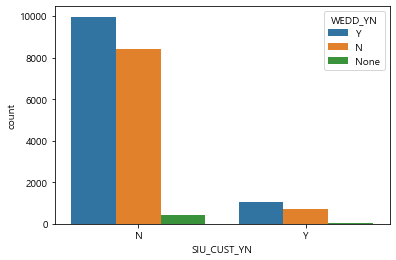

In [86]:
sns.countplot(x = 'SIU_CUST_YN', data = df_cust, hue = 'WEDD_YN')

<AxesSubplot:xlabel='WEDD_YN', ylabel='count'>

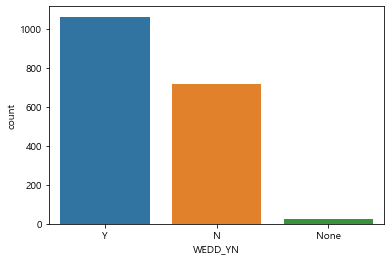

In [84]:
sns.countplot(x = 'WEDD_YN', data = df_cust_yes, order = df_cust_yes['WEDD_YN'].value_counts().index)

<AxesSubplot:xlabel='WEDD_YN', ylabel='count'>

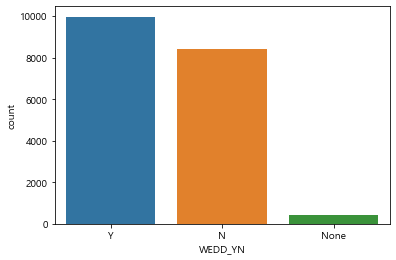

In [85]:
sns.countplot(x = 'WEDD_YN', data = df_cust_no, order = df_cust_no['WEDD_YN'].value_counts().index)

In [279]:
df_cust_yes['WEDD_YN'].value_counts()

Y       1062
N        717
None      27
Name: WEDD_YN, dtype: int64

In [280]:
df_cust_no['WEDD_YN'].value_counts()

Y       9973
N       8421
None     407
Name: WEDD_YN, dtype: int64

In [281]:
import numpy as np
from scipy.stats import chi2_contingency

# 주어진 데이터셋 (예시)
data = np.array([[9973, 18801-9973], [1062, 1806-1062]])  # 주부인 경우와 아닌 경우에 대한 교차표

# 카이제곱 검정 수행
chi2, p_value, _, _ = chi2_contingency(data)
print(p_value)
# 유의성 검정 결과 출력
if p_value < 0.05:
    print("귀무가설을 기각합니다. 결혼여부와 보험 사기 여부 간에 유의한 관련성이 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 결혼여부와 보험 사기 여부 간에 유의한 관련성이 없습니다.")


3.1242058927003555e-06
귀무가설을 기각합니다. 결혼여부와 보험 사기 여부 간에 유의한 관련성이 있습니다.


<AxesSubplot:xlabel='RESI_TYPE_CODE', ylabel='count'>

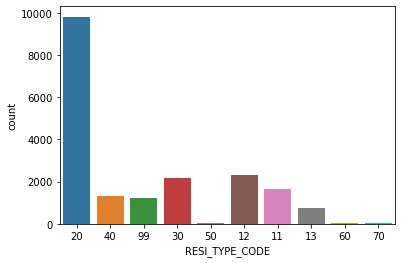

In [5]:
sns.countplot(x = 'RESI_TYPE_CODE', data = df_cust)

<AxesSubplot:xlabel='RESI_TYPE_CODE', ylabel='count'>

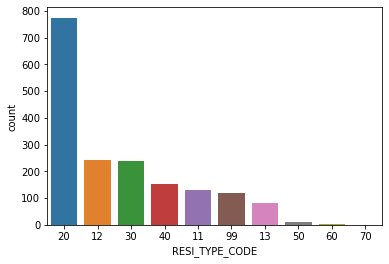

In [6]:
sns.countplot(x = 'RESI_TYPE_CODE', data = df_cust_yes, order = df_cust_yes['RESI_TYPE_CODE'].value_counts().index)

<AxesSubplot:xlabel='RESI_TYPE_CODE', ylabel='count'>

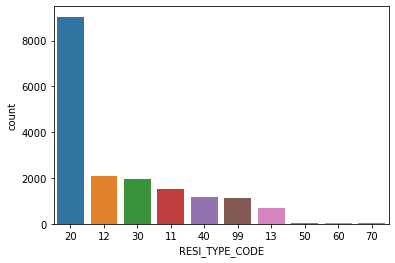

In [7]:
sns.countplot(x = 'RESI_TYPE_CODE', data = df_cust_no, order = df_cust_no['RESI_TYPE_CODE'].value_counts().index)

In [8]:
df_cust_yes['RESI_TYPE_CODE'].value_counts(normalize = True)

20    0.442792
12    0.139016
30    0.136156
40    0.086384
11    0.073799
99    0.067506
13    0.046911
50    0.005149
60    0.001716
70    0.000572
Name: RESI_TYPE_CODE, dtype: float64

In [9]:
df_cust_no['RESI_TYPE_CODE'].value_counts(normalize = True)

20    0.510190
12    0.117880
30    0.110258
11    0.085982
40    0.067069
99    0.063513
13    0.038221
50    0.002879
60    0.002428
70    0.001581
Name: RESI_TYPE_CODE, dtype: float64

<AxesSubplot:xlabel='CHLD_CNT', ylabel='count'>

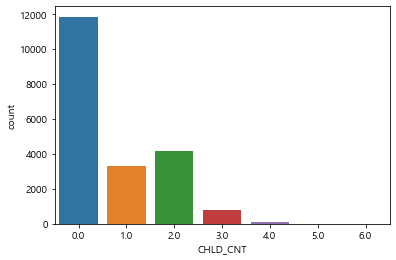

In [282]:
sns.countplot(x = 'CHLD_CNT', data = df_cust)

<AxesSubplot:xlabel='CHLD_CNT', ylabel='count'>

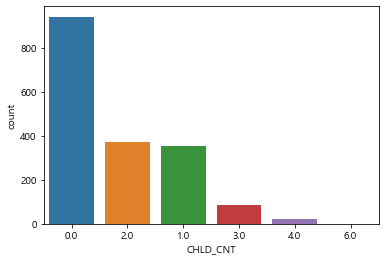

In [87]:
sns.countplot(x = 'CHLD_CNT', data = df_cust_yes, order = df_cust_yes['CHLD_CNT'].value_counts().index)

<AxesSubplot:xlabel='CHLD_CNT', ylabel='count'>

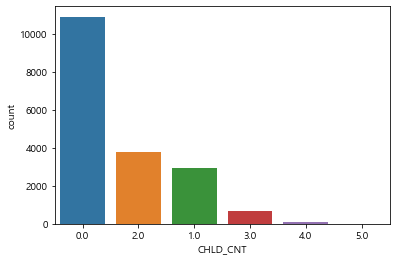

In [88]:
sns.countplot(x = 'CHLD_CNT', data = df_cust_no, order = df_cust_no['CHLD_CNT'].value_counts().index)

<AxesSubplot:xlabel='SEX', ylabel='count'>

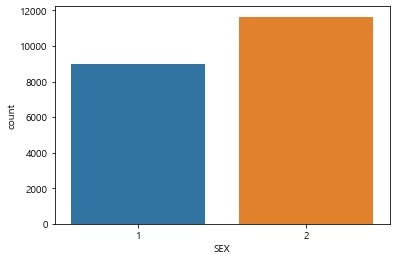

In [283]:
sns.countplot(x = 'SEX', data = df_cust)

<AxesSubplot:xlabel='SEX', ylabel='count'>

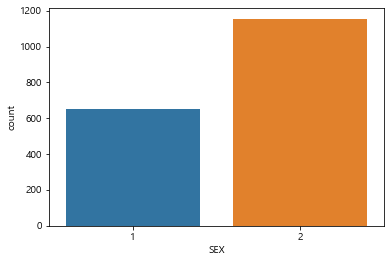

In [70]:
sns.countplot(x = 'SEX', data = df_cust_yes)

<AxesSubplot:xlabel='SEX', ylabel='count'>

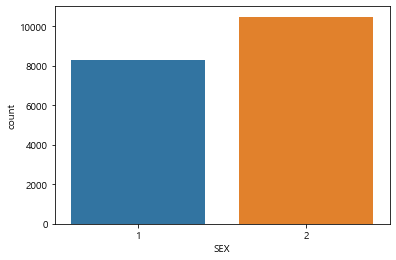

In [71]:
sns.countplot(x = 'SEX', data = df_cust_no)

In [287]:
df_cust['SEX'].value_counts()

2    11646
1     8961
Name: SEX, dtype: int64

In [284]:
df_cust_yes['SEX'].value_counts()

2    1155
1     651
Name: SEX, dtype: int64

In [285]:
df_cust_no['SEX'].value_counts()

2    10491
1     8310
Name: SEX, dtype: int64

In [296]:
import numpy as np
from scipy.stats import chi2_contingency

# 주어진 데이터셋 (예시)
data = np.array([[10491, 18801-10491], [1155, 1806-1155]])  # 여자인 경우와 아닌 경우에 대한 교차표

# 카이제곱 검정 수행
chi2, p_value, _, _ = chi2_contingency(data)
print(p_value)
# 유의성 검정 결과 출력
if p_value < 0.05:
    print("귀무가설을 기각합니다. 여자와 보험 사기 여부 간에 유의한 관련성이 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 여자와 보험 사기 여부 간에 유의한 관련성이 없습니다.")


2.9064414184147852e-11
귀무가설을 기각합니다. 여자와 보험 사기 여부 간에 유의한 관련성이 있습니다.


<AxesSubplot:xlabel='SIU_CUST_YN', ylabel='count'>

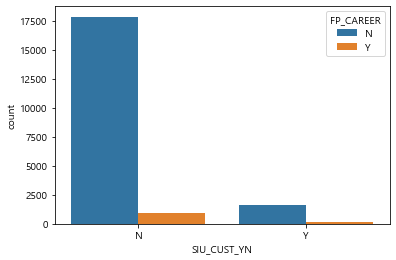

In [72]:
sns.countplot(x = 'SIU_CUST_YN', data = df_cust, hue = 'FP_CAREER')

<AxesSubplot:xlabel='FP_CAREER', ylabel='count'>

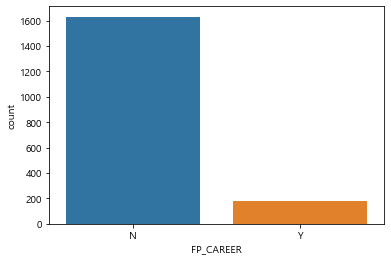

In [73]:
sns.countplot(x = 'FP_CAREER', data = df_cust_yes)

<AxesSubplot:xlabel='FP_CAREER', ylabel='count'>

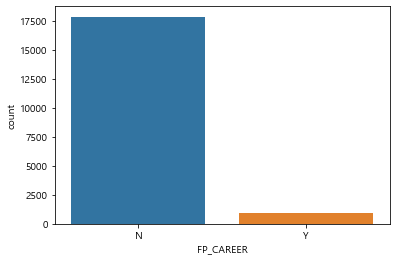

In [74]:
sns.countplot(x = 'FP_CAREER', data = df_cust_no)

In [196]:
df_cust_yes['FP_CAREER'].value_counts() #10%정도

N    1630
Y     176
Name: FP_CAREER, dtype: int64

In [197]:
df_cust_no['FP_CAREER'].value_counts() #5%정도

N    17858
Y      943
Name: FP_CAREER, dtype: int64

In [278]:
import numpy as np
from scipy.stats import chi2_contingency

# 주어진 데이터셋 (예시)
data = np.array([[943, 17858], [176, 1630]])  # 주부인 경우와 아닌 경우에 대한 교차표

# 카이제곱 검정 수행
chi2, p_value, _, _ = chi2_contingency(data)
print(p_value)
# 유의성 검정 결과 출력
if p_value < 0.05:
    print("귀무가설을 기각합니다. FP경력과 보험 사기 여부 간에 유의한 관련성이 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다. FP경력과 보험 사기 여부 간에 유의한 관련성이 없습니다.")


3.8433568036475066e-17
귀무가설을 기각합니다. FP경력과 보험 사기 여부 간에 유의한 관련성이 있습니다.


<AxesSubplot:xlabel='OCCP_GRP_1', ylabel='count'>

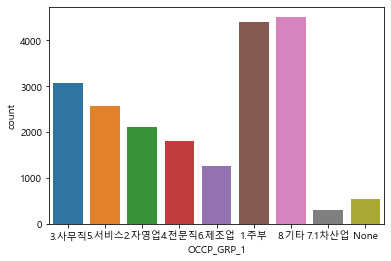

In [198]:
sns.countplot(x = 'OCCP_GRP_1', data = df_cust)

<AxesSubplot:xlabel='SIU_CUST_YN', ylabel='count'>

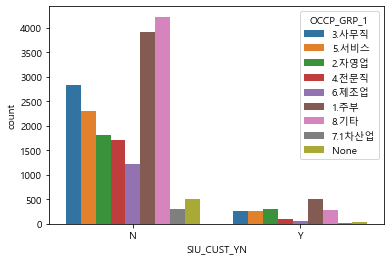

In [78]:
sns.countplot(x = 'SIU_CUST_YN', data = df_cust, hue = 'OCCP_GRP_1')

<AxesSubplot:xlabel='OCCP_GRP_1', ylabel='count'>

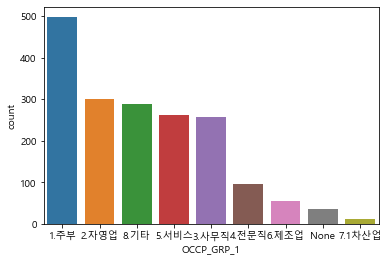

In [91]:
sns.countplot(x = 'OCCP_GRP_1', data = df_cust_yes, order = df_cust_yes['OCCP_GRP_1'].value_counts().index)

<AxesSubplot:xlabel='OCCP_GRP_1', ylabel='count'>

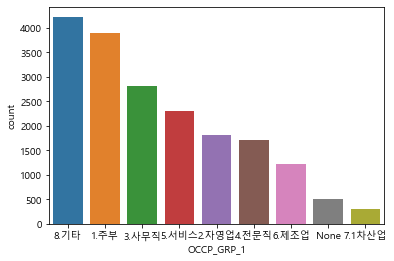

In [92]:
sns.countplot(x = 'OCCP_GRP_1', data = df_cust_no, order = df_cust_no['OCCP_GRP_1'].value_counts().index)

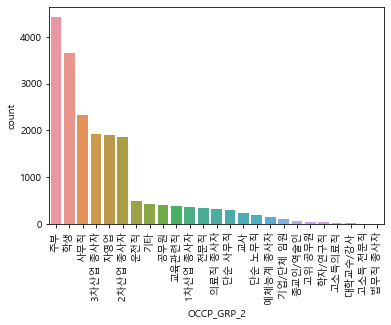

In [206]:
sns.countplot(x = 'OCCP_GRP_2', data = df_cust,order = df_cust['OCCP_GRP_2'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

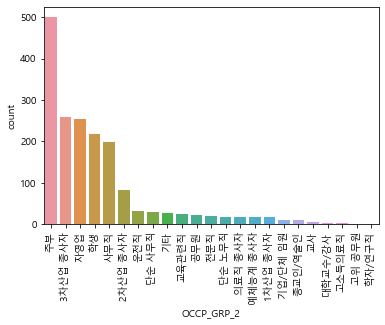

In [204]:
sns.countplot(x = 'OCCP_GRP_2', data = df_cust_yes, order = df_cust_yes['OCCP_GRP_2'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

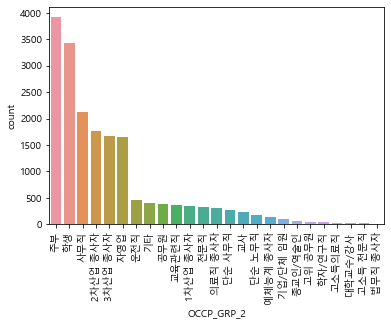

In [205]:
sns.countplot(x = 'OCCP_GRP_2', data = df_cust_no, order = df_cust_no['OCCP_GRP_2'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [207]:
df_cust_yes['OCCP_GRP_2'].value_counts()

주부          500
3차산업 종사자    259
자영업         254
학생          219
사무직         199
2차산업 종사자     83
운전직          32
단순 사무직       29
기타           27
교육관련직        26
공무원          22
전문직          19
단순 노무직       18
의료직 종사자      18
예체능계 종사자     17
1차산업 종사자     17
기업/단체 임원     10
종교인/역술인      10
교사            6
대학교수/강사       2
고소득의료직        2
고위 공무원        1
학자/연구직        1
Name: OCCP_GRP_2, dtype: int64

In [208]:
df_cust_no['OCCP_GRP_2'].value_counts()

주부          3915
학생          3435
사무직         2130
2차산업 종사자    1769
3차산업 종사자    1663
자영업         1646
운전직          458
기타           400
공무원          385
교육관련직        363
1차산업 종사자     342
전문직          326
의료직 종사자      308
단순 사무직       272
교사           237
단순 노무직       171
예체능계 종사자     144
기업/단체 임원     108
종교인/역술인       56
고위 공무원        41
학자/연구직        38
고소득의료직        33
대학교수/강사       28
고소득 전문직       16
법무직 종사자        5
Name: OCCP_GRP_2, dtype: int64

In [209]:
import numpy as np
from scipy.stats import chi2_contingency

# 주어진 데이터셋 (예시)
data = np.array([[500, 1306], [3915, 14886]])  # 주부인 경우와 아닌 경우에 대한 교차표

# 카이제곱 검정 수행
chi2, p_value, _, _ = chi2_contingency(data)

# 유의성 검정 결과 출력
if p_value < 0.05:
    print("귀무가설을 기각합니다. 주부의 참여와 보험 사기 여부 간에 유의한 관련성이 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 주부의 참여와 보험 사기 여부 간에 유의한 관련성이 없습니다.")


귀무가설을 기각합니다. 주부의 참여와 보험 사기 여부 간에 유의한 관련성이 있습니다.


In [210]:
import numpy as np
from scipy.stats import chi2_contingency

# 주어진 데이터셋 (예시)
data = np.array([[254, 1552], [1646, 17155]])  # 자영업인 경우와 아닌 경우에 대한 교차표

# 카이제곱 검정 수행
chi2, p_value, _, _ = chi2_contingency(data)

# 유의성 검정 결과 출력
if p_value < 0.05:
    print("귀무가설을 기각합니다. 자영업자의 참여와 보험 사기 여부 간에 유의한 관련성이 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 자영업자의 참여와 보험 사기 여부 간에 유의한 관련성이 없습니다.")

귀무가설을 기각합니다. 자영업자의 참여와 보험 사기 여부 간에 유의한 관련성이 있습니다.


In [211]:
import numpy as np
from scipy.stats import chi2_contingency

# 주어진 데이터셋 (예시)
data = np.array([[259, 1547], [1663, 17138]])  # 3차 산업 종사자인 경우와 아닌 경우에 대한 교차표

# 카이제곱 검정 수행
chi2, p_value, _, _ = chi2_contingency(data)

# 유의성 검정 결과 출력
if p_value < 0.05:
    print("귀무가설을 기각합니다. 3차 산업 종사자의 참여와 보험 사기 여부 간에 유의한 관련성이 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 3차 산업 종사자의 참여와 보험 사기 여부 간에 유의한 관련성이 없습니다.")

귀무가설을 기각합니다. 3차 산업 종사자의 참여와 보험 사기 여부 간에 유의한 관련성이 있습니다.


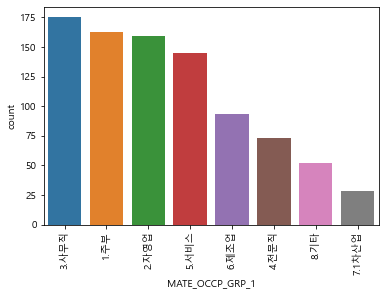

In [258]:
sns.countplot(x = 'MATE_OCCP_GRP_1', data = df_cust_yes, order = df_cust_yes['MATE_OCCP_GRP_1'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

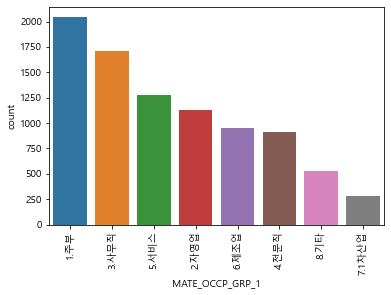

In [259]:
sns.countplot(x = 'MATE_OCCP_GRP_1', data = df_cust_no, order = df_cust_no['MATE_OCCP_GRP_1'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [26]:
df_cust.columns

Index(['CUST_ID', 'SIU_CUST_YN', 'SEX', 'AGE', 'RESI_COST', 'RESI_TYPE_CODE',
       'FP_CAREER', 'CUST_RGST', 'CTPR', 'OCCP_GRP_1', 'OCCP_GRP_2',
       'TOTALPREM', 'MINCRDT', 'MAXCRDT', 'WEDD_YN', 'MATE_OCCP_GRP_1',
       'MATE_OCCP_GRP_2', 'CHLD_CNT', 'CUST_INCM', 'RCBASE_HSHD_INCM',
       'JPBASE_HSHD_INCM'],
      dtype='object')

In [21]:
set(df_cust['RESI_TYPE_CODE'])

{'11', '12', '13', '20', '30', '40', '50', '60', '70', '99', nan}

In [23]:
set(df_cust['FP_CAREER'])

{'N', 'Y'}

In [27]:
set(df_cust['OCCP_GRP_1'])

{'1.주부', '2.자영업', '3.사무직', '4.전문직', '5.서비스', '6.제조업', '7.1차산업', '8.기타', 'None'}

In [28]:
set(df_cust['OCCP_GRP_2'])

{'1차산업 종사자',
 '2차산업 종사자',
 '3차산업 종사자',
 nan,
 '고소득 전문직',
 '고소득의료직',
 '고위 공무원',
 '공무원',
 '교사',
 '교육관련직',
 '기업/단체 임원',
 '기타',
 '단순 노무직',
 '단순 사무직',
 '대학교수/강사',
 '법무직 종사자',
 '사무직',
 '예체능계 종사자',
 '운전직',
 '의료직 종사자',
 '자영업',
 '전문직',
 '종교인/역술인',
 '주부',
 '학생',
 '학자/연구직'}

In [32]:
set(df_cust['WEDD_YN'])

{'N', 'None', 'Y'}

<AxesSubplot:xlabel='RCBASE_HSHD_INCM', ylabel='Count'>

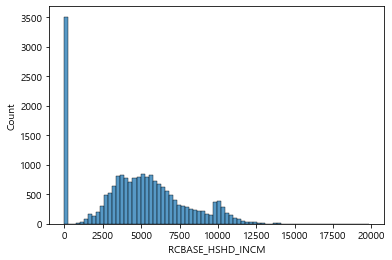

In [48]:
sns.histplot(x='RCBASE_HSHD_INCM', data=df_cust)

<AxesSubplot:xlabel='RCBASE_HSHD_INCM', ylabel='Count'>

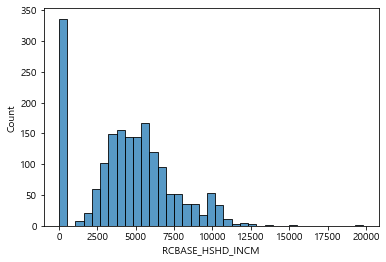

In [93]:
sns.histplot(x='RCBASE_HSHD_INCM', data=df_cust_yes)

<AxesSubplot:xlabel='RCBASE_HSHD_INCM', ylabel='Count'>

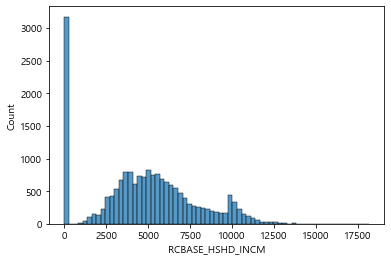

In [94]:
sns.histplot(x='RCBASE_HSHD_INCM', data=df_cust_no)

In [260]:
np.mean(df_cust_yes['CUST_INCM'])

2520.2883597883597

In [261]:
np.mean(df_cust_no['CUST_INCM'])

2723.237177690583

In [262]:
np.mean(df_cust_yes['RCBASE_HSHD_INCM'])

4477.480066445182

In [263]:
np.mean(df_cust_no['RCBASE_HSHD_INCM'])

4800.783681719057

In [264]:
np.mean(df_cust_yes['JPBASE_HSHD_INCM'])

5104.164391353811

In [265]:
np.mean(df_cust_no['JPBASE_HSHD_INCM'])

5213.688093018154

In [266]:
import numpy as np
from scipy.stats import ttest_ind

# 데이터 (예시)
group1_income = df_cust_yes['CUST_INCM']  # 사기를 치는 경우의 소득
group2_income = df_cust_no['CUST_INCM']  # 안 치는 경우의 소득

# 독립표본 t-test 수행
t_statistic, p_value = ttest_ind(group1_income, group2_income)

# 유의성 검정 결과 출력
if p_value < 0.05:
    print("귀무가설을 기각합니다. 사기를 치는 집단의 소득과 안 치는 집단의 소득의 차이는 유의미합니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 사기를 치는 집단의 소득과 안 치는 집단의 소득의 차이는 유의미하지 않습니다.")

귀무가설을 기각할 수 없습니다. 사기를 치는 집단의 소득과 안 치는 집단의 소득의 차이는 유의미하지 않습니다.


In [267]:
import numpy as np
from scipy.stats import ttest_ind

# 데이터 (예시)
group1_income = df_cust_yes['RCBASE_HSHD_INCM']  # 사기를 치는 경우의 소득
group2_income = df_cust_no['RCBASE_HSHD_INCM']  # 안 치는 경우의 소득

# 독립표본 t-test 수행
t_statistic, p_value = ttest_ind(group1_income, group2_income)

# 유의성 검정 결과 출력
if p_value < 0.05:
    print("귀무가설을 기각합니다. 사기를 치는 집단의 소득과 안 치는 집단의 소득의 차이는 유의미합니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 사기를 치는 집단의 소득과 안 치는 집단의 소득의 차이는 유의미하지 않습니다.")

귀무가설을 기각합니다. 사기를 치는 집단의 소득과 안 치는 집단의 소득의 차이는 유의미합니다.


In [268]:
import numpy as np
from scipy.stats import ttest_ind

# 데이터 (예시)
group1_income = df_cust_yes['JPBASE_HSHD_INCM']  # 사기를 치는 경우의 소득
group2_income = df_cust_no['JPBASE_HSHD_INCM']  # 안 치는 경우의 소득

# 독립표본 t-test 수행
t_statistic, p_value = ttest_ind(group1_income, group2_income)

# 유의성 검정 결과 출력
if p_value < 0.05:
    print("귀무가설을 기각합니다. 사기를 치는 집단의 소득과 안 치는 집단의 소득의 차이는 유의미합니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 사기를 치는 집단의 소득과 안 치는 집단의 소득의 차이는 유의미하지 않습니다.")

귀무가설을 기각할 수 없습니다. 사기를 치는 집단의 소득과 안 치는 집단의 소득의 차이는 유의미하지 않습니다.


<AxesSubplot:xlabel='JPBASE_HSHD_INCM', ylabel='Count'>

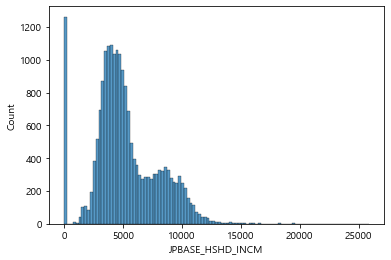

In [49]:
sns.histplot(x='JPBASE_HSHD_INCM', data=df_cust)

<AxesSubplot:xlabel='JPBASE_HSHD_INCM', ylabel='Count'>

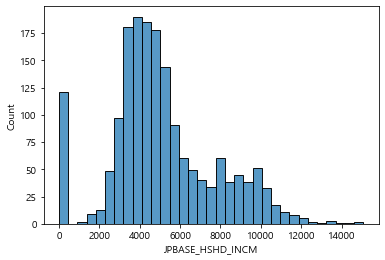

In [96]:
sns.histplot(x='JPBASE_HSHD_INCM', data=df_cust_yes)

<AxesSubplot:xlabel='JPBASE_HSHD_INCM', ylabel='Count'>

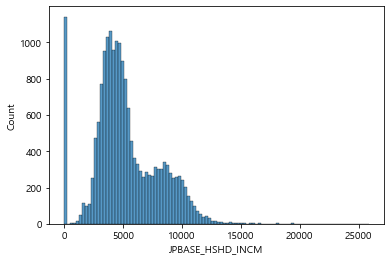

In [97]:
sns.histplot(x='JPBASE_HSHD_INCM', data=df_cust_no)

<AxesSubplot:xlabel='CUST_INCM', ylabel='Count'>

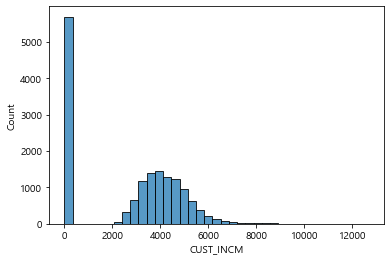

In [98]:
sns.histplot(x='CUST_INCM', data=df_cust)

<AxesSubplot:xlabel='CUST_INCM', ylabel='Count'>

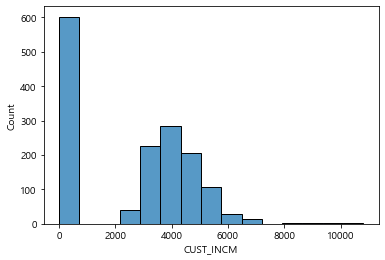

In [99]:
sns.histplot(x='CUST_INCM', data=df_cust_yes)

<AxesSubplot:xlabel='CUST_INCM', ylabel='Count'>

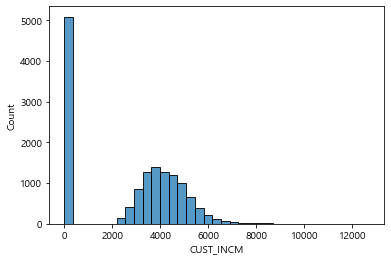

In [100]:
sns.histplot(x='CUST_INCM', data=df_cust_no)

<AxesSubplot:xlabel='RESI_COST', ylabel='Count'>

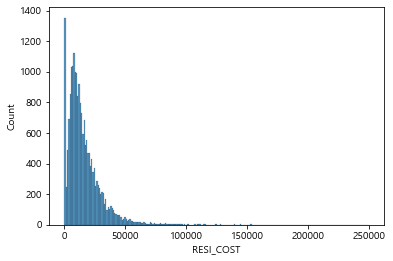

In [101]:
sns.histplot(x='RESI_COST', data=df_cust)

<AxesSubplot:xlabel='RESI_COST', ylabel='Count'>

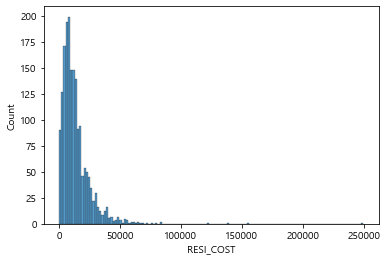

In [102]:
sns.histplot(x='RESI_COST', data=df_cust_yes)

<AxesSubplot:xlabel='RESI_COST', ylabel='Count'>

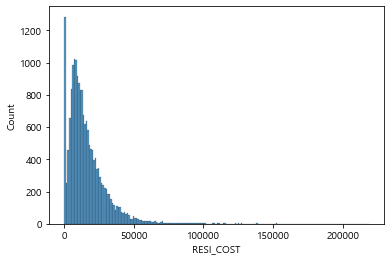

In [103]:
sns.histplot(x='RESI_COST', data=df_cust_no)

<AxesSubplot:xlabel='TOTALPREM', ylabel='Count'>

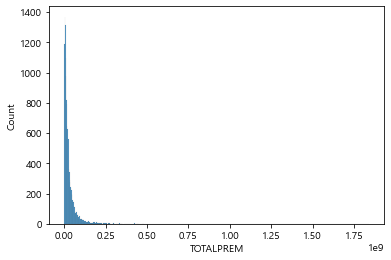

In [109]:
sns.histplot(x='TOTALPREM', data=df_cust)

In [254]:
np.mean(df_cust_yes['TOTALPREM'])

29857461.202

<AxesSubplot:xlabel='TOTALPREM', ylabel='Count'>

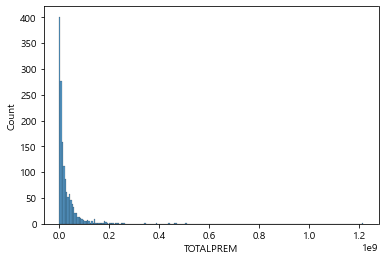

In [110]:
sns.histplot(x='TOTALPREM', data=df_cust_yes)

In [255]:
np.mean(df_cust_no['TOTALPREM'])

30128788.510590453

<AxesSubplot:xlabel='TOTALPREM', ylabel='Count'>

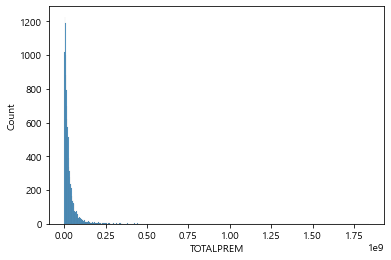

In [111]:
sns.histplot(x='TOTALPREM', data=df_cust_no)

<AxesSubplot:xlabel='AGE', ylabel='Count'>

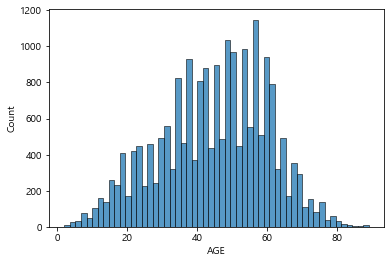

In [290]:
sns.histplot(x='AGE', data=df_cust)

<AxesSubplot:xlabel='AGE', ylabel='Count'>

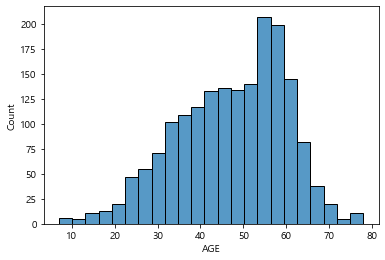

In [291]:
sns.histplot(x='AGE', data=df_cust_yes)

<AxesSubplot:xlabel='AGE', ylabel='Count'>

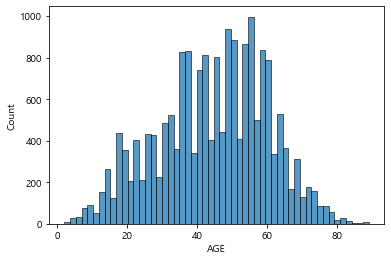

In [292]:
sns.histplot(x='AGE', data=df_cust_no)

<AxesSubplot:xlabel='CTPR', ylabel='count'>

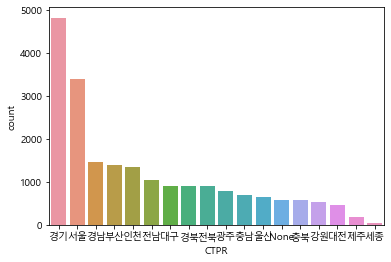

In [108]:
sns.countplot(x = 'CTPR', data = df_cust, order = df_cust['CTPR'].value_counts().index)

<AxesSubplot:xlabel='CTPR', ylabel='count'>

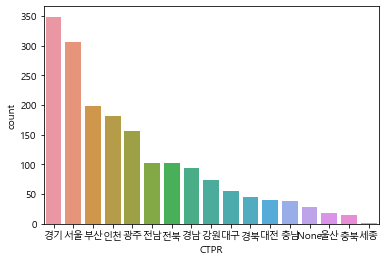

In [106]:
sns.countplot(x = 'CTPR', data = df_cust_yes, order = df_cust_yes['CTPR'].value_counts().index)

<AxesSubplot:xlabel='CTPR', ylabel='count'>

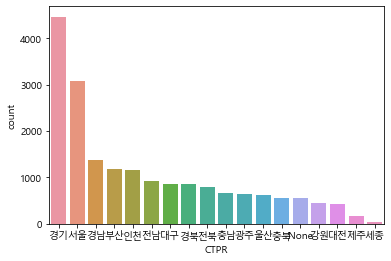

In [107]:
sns.countplot(x = 'CTPR', data = df_cust_no, order = df_cust_no['CTPR'].value_counts().index)

In [241]:
yes = df_cust_yes['CTPR'].value_counts(normalize = False).sort_index()
yes

None     28
강원       74
경기      349
경남       94
경북       45
광주      156
대구       56
대전       40
부산      198
서울      306
세종        2
울산       19
인천      181
전남      102
전북      102
충남       39
충북       15
Name: CTPR, dtype: int64

In [243]:
no = df_cust_no['CTPR'].value_counts(normalize = False).sort_index()
no

None     547
강원       450
경기      4469
경남      1368
경북       851
광주       641
대구       853
대전       426
부산      1192
서울      3083
세종        35
울산       626
인천      1153
전남       934
전북       790
제주       174
충남       654
충북       555
Name: CTPR, dtype: int64

In [245]:
import numpy as np
from scipy.stats import chi2_contingency

for i in range(12):
    a = yes[i]
    b = 1806 - yes[i]
    c = no[i]
    d = 18801- no[i]

    data = np.array([[a, b], [c, d]])  # 자영업인 경우와 아닌 경우에 대한 교차표
    chi2, p_value, _, _ = chi2_contingency(data)
    if p_value < 0.05:
        print("귀무가설을 기각합니다. 지역과 보험 사기 여부 간에 유의한 관련성이 있습니다.")
    else:
        print("귀무가설을 기각할 수 없습니다. 지역과 보험 사기 여부 간에 유의한 관련성이 없습니다.")

귀무가설을 기각합니다. 지역과 보험 사기 여부 간에 유의한 관련성이 있습니다.
귀무가설을 기각합니다. 지역과 보험 사기 여부 간에 유의한 관련성이 있습니다.
귀무가설을 기각합니다. 지역과 보험 사기 여부 간에 유의한 관련성이 있습니다.
귀무가설을 기각합니다. 지역과 보험 사기 여부 간에 유의한 관련성이 있습니다.
귀무가설을 기각합니다. 지역과 보험 사기 여부 간에 유의한 관련성이 있습니다.
귀무가설을 기각합니다. 지역과 보험 사기 여부 간에 유의한 관련성이 있습니다.
귀무가설을 기각합니다. 지역과 보험 사기 여부 간에 유의한 관련성이 있습니다.
귀무가설을 기각할 수 없습니다. 지역과 보험 사기 여부 간에 유의한 관련성이 없습니다.
귀무가설을 기각합니다. 지역과 보험 사기 여부 간에 유의한 관련성이 있습니다.
귀무가설을 기각할 수 없습니다. 지역과 보험 사기 여부 간에 유의한 관련성이 없습니다.
귀무가설을 기각할 수 없습니다. 지역과 보험 사기 여부 간에 유의한 관련성이 없습니다.
귀무가설을 기각합니다. 지역과 보험 사기 여부 간에 유의한 관련성이 있습니다.


<AxesSubplot:xlabel='MINCRDT', ylabel='count'>

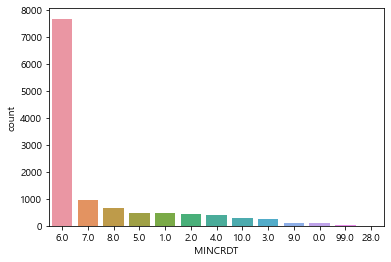

In [113]:
sns.countplot(x = 'MINCRDT', data = df_cust, order = df_cust['MINCRDT'].value_counts().index)

<AxesSubplot:xlabel='MINCRDT', ylabel='count'>

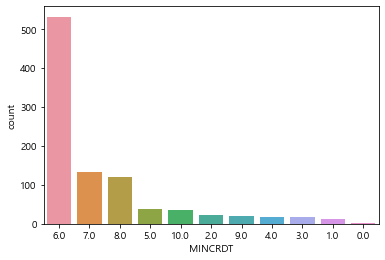

In [114]:
sns.countplot(x = 'MINCRDT', data = df_cust_yes, order = df_cust_yes['MINCRDT'].value_counts().index)
#신용등급이 매우 높은 경우에는 사기를 치는 경우가 없음. 

<AxesSubplot:xlabel='MINCRDT', ylabel='count'>

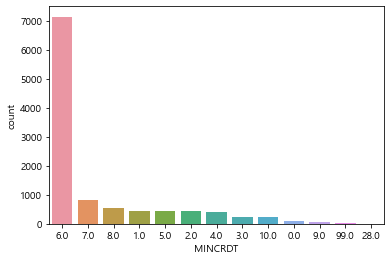

In [115]:
sns.countplot(x = 'MINCRDT', data = df_cust_no, order = df_cust_no['MINCRDT'].value_counts().index)

<AxesSubplot:xlabel='MAXCRDT', ylabel='count'>

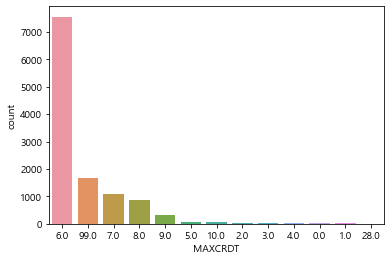

In [116]:
sns.countplot(x = 'MAXCRDT', data = df_cust, order = df_cust['MAXCRDT'].value_counts().index)

<AxesSubplot:xlabel='MAXCRDT', ylabel='count'>

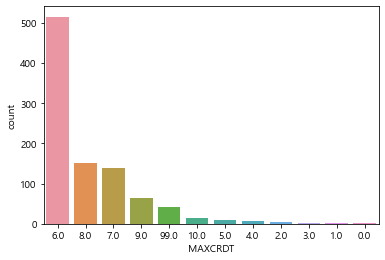

In [117]:
sns.countplot(x = 'MAXCRDT', data = df_cust_yes, order = df_cust_yes['MAXCRDT'].value_counts().index)
#최소신용등급이든 최대신용등급이든 보험사기인 경우가 신용등급이 전체적으로 낮은 경향을 확인할 수 있다.

<AxesSubplot:xlabel='MAXCRDT', ylabel='count'>

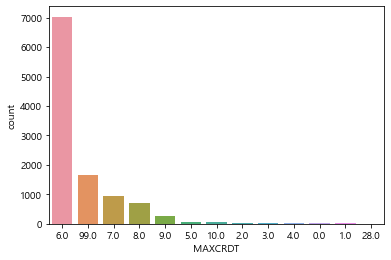

In [118]:
sns.countplot(x = 'MAXCRDT', data = df_cust_no, order = df_cust_no['MAXCRDT'].value_counts().index)

In [129]:
date = df_cust['CUST_RGST'][0]
date

199910.0

In [137]:
df_cust['CUST_RGST'].dtype

dtype('float64')

In [138]:
df_cust['CUST_RGST']= df_cust['CUST_RGST'].astype('str')

In [143]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20607 entries, 0 to 22399
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CUST_ID           20607 non-null  int64  
 1   SIU_CUST_YN       20607 non-null  object 
 2   SEX               20607 non-null  int64  
 3   AGE               20607 non-null  int64  
 4   RESI_COST         20607 non-null  int64  
 5   RESI_TYPE_CODE    19461 non-null  object 
 6   FP_CAREER         20607 non-null  object 
 7   CUST_RGST         20607 non-null  object 
 8   CTPR              20607 non-null  object 
 9   OCCP_GRP_1        20607 non-null  object 
 10  OCCP_GRP_2        20060 non-null  object 
 11  TOTALPREM         15286 non-null  float64
 12  MINCRDT           11841 non-null  float64
 13  MAXCRDT           11841 non-null  float64
 14  WEDD_YN           20607 non-null  object 
 15  MATE_OCCP_GRP_1   9722 non-null   object 
 16  MATE_OCCP_GRP_2   9722 non-null   object

In [156]:
df_cust['CUST_RGST'][0][4:6]

'10'

In [148]:
df_cust['year'] = df_cust['CUST_RGST'].apply(lambda x : x[0:4])

In [157]:
df_cust['month'] = df_cust['CUST_RGST'].apply(lambda x : x[4:6])

In [150]:
df_cust['year']

0        1999
1        1999
2        1999
3        1999
4        1999
         ... 
22394    2003
22396    2003
22397    2005
22398    2003
22399    2003
Name: year, Length: 20607, dtype: object

In [159]:
set(df_cust['year']) #101인거는 무슨 의미인지 몰라서 우선 그대로 포함시킴

{'101.',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 'nan'}

In [168]:
df_cust_yes = df_cust[df_cust['SIU_CUST_YN']=='Y']
df_cust_no = df_cust[df_cust['SIU_CUST_YN']=='N']

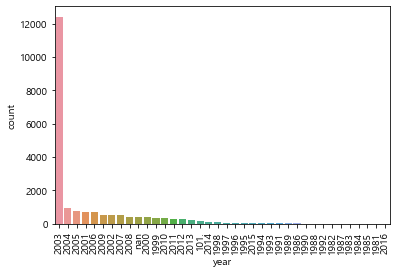

In [169]:
sns.countplot(x = 'year', data = df_cust, order = df_cust['year'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

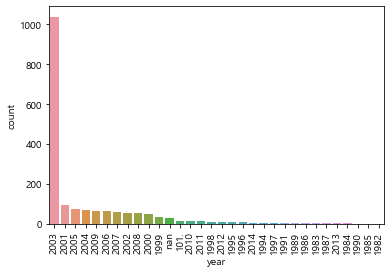

In [171]:
sns.countplot(x = 'year', data = df_cust_yes, order = df_cust_yes['year'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

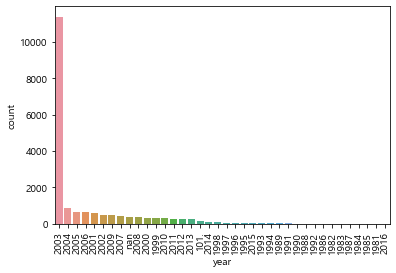

In [172]:
sns.countplot(x = 'year', data = df_cust_no, order = df_cust_no['year'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [276]:
df_cust_yes['year'].value_counts()

2003    1039
2001      95
2005      76
2004      69
2009      64
2006      64
2007      58
2002      55
2008      53
2000      47
1999      36
nan       27
101.      16
2010      16
2011      13
1998      11
2012      11
1995       8
1996       7
2014       6
1994       5
1997       5
1991       4
1989       3
1986       3
1983       3
1987       3
2013       3
1984       3
1990       1
1985       1
1982       1
Name: year, dtype: int64

In [275]:
import numpy as np
from scipy.stats import chi2_contingency

# 주어진 데이터셋 (예시)
data = np.array([[611, 18801-611], [95, 1806-95]])  # 주부인 경우와 아닌 경우에 대한 교차표

# 카이제곱 검정 수행
chi2, p_value, _, _ = chi2_contingency(data)

# 유의성 검정 결과 출력
if p_value < 0.05:
    print("귀무가설을 기각합니다. 고객등록날짜와 보험 사기 여부 간에 유의한 관련성이 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 고객등록날짜와 보험 사기 여부 간에 유의한 관련성이 없습니다.")


귀무가설을 기각합니다. 고객등록날짜와 보험 사기 여부 간에 유의한 관련성이 있습니다.


In [174]:
df_cust['SIU_CUST_YN'].value_counts()

N    18801
Y     1806
Name: SIU_CUST_YN, dtype: int64

In [178]:
df_cust_no.shape

(18801, 23)

In [176]:
df_cust_yes['year'].value_counts()# 1806명 중에 1039명이 2003년에 가입한 것(보험 사기친 사람들이)

2003    1039
2001      95
2005      76
2004      69
2009      64
2006      64
2007      58
2002      55
2008      53
2000      47
1999      36
nan       27
101.      16
2010      16
2011      13
1998      11
2012      11
1995       8
1996       7
2014       6
1994       5
1997       5
1991       4
1989       3
1986       3
1983       3
1987       3
2013       3
1984       3
1990       1
1985       1
1982       1
Name: year, dtype: int64

In [179]:
df_cust_no['year'].value_counts()#18801명 중에 11280명(퍼센트로 따지기)

2003    11380
2004      850
2005      665
2006      631
2001      611
2002      474
2009      468
2007      447
nan       392
2008      377
2000      339
1999      333
2010      323
2011      287
2012      260
2013      237
101.      132
2014      117
1998       74
1997       65
1996       60
1995       45
2015       43
1993       24
1994       20
1989       18
1991       17
1990       16
1988       16
1992       15
1986       15
1982       12
1983        9
1987        9
1984        8
1985        7
1981        3
2016        2
Name: year, dtype: int64

In [246]:
df_cust_no['OCCP_GRP_1'].value_counts()#18801명 중에 주부 3904명(21 퍼센트로 따지기)

8.기타      4226
1.주부      3904
3.사무직     2824
5.서비스     2302
2.자영업     1808
4.전문직     1711
6.제조업     1214
None       512
7.1차산업     300
Name: OCCP_GRP_1, dtype: int64

In [247]:
df_cust_yes['OCCP_GRP_1'].value_counts()#1806명 중에 주부 498명(28 퍼센트로 따지기)

1.주부      498
2.자영업     301
8.기타      288
5.서비스     263
3.사무직     258
4.전문직      97
6.제조업      54
None       35
7.1차산업     12
Name: OCCP_GRP_1, dtype: int64

In [194]:
import numpy as np
from scipy.stats import chi2_contingency

# 주어진 데이터셋 (예시)
data = np.array([[3904, 14897], [498, 1308]])  # 주부인 경우와 아닌 경우에 대한 교차표

# 카이제곱 검정 수행
chi2, p_value, _, _ = chi2_contingency(data)

# 유의성 검정 결과 출력
if p_value < 0.05:
    print("귀무가설을 기각합니다. 주부의 참여와 보험 사기 여부 간에 유의한 관련성이 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 주부의 참여와 보험 사기 여부 간에 유의한 관련성이 없습니다.")


귀무가설을 기각합니다. 주부의 참여와 보험 사기 여부 간에 유의한 관련성이 있습니다.


In [195]:
p_value

1.8882071461110524e-11

In [248]:
import numpy as np
from scipy.stats import chi2_contingency

# 주어진 데이터셋 (예시)
data = np.array([[1808, 16993], [301, 1505]])  # 주부인 경우와 아닌 경우에 대한 교차표

# 카이제곱 검정 수행
chi2, p_value, _, _ = chi2_contingency(data)

# 유의성 검정 결과 출력
if p_value < 0.05:
    print("귀무가설을 기각합니다. 자영업자의 참여와 보험 사기 여부 간에 유의한 관련성이 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 자영업자의 참여와 보험 사기 여부 간에 유의한 관련성이 없습니다.")


귀무가설을 기각합니다. 자영업자의 참여와 보험 사기 여부 간에 유의한 관련성이 있습니다.


In [293]:
df_cust

,CUST_ID,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,...,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM,year,month
0,1,N,2,47,21111,20,N,199910.0,충북,3.사무직,...,NaN,Y,3.사무직,2차산업 종사자,2.0,4879.0,10094,11337.0,1999,10
1,2,N,1,53,40000,20,N,199910.0,서울,3.사무직,...,6.0,Y,1.주부,주부,2.0,6509.0,9143,6509.0,1999,10
2,3,N,1,60,0,NaN,N,199910.0,서울,5.서비스,...,NaN,N,NaN,NaN,0.0,4180.0,0,4180.0,1999,10
3,4,N,2,64,12861,40,Y,199910.0,경기,2.자영업,...,99.0,N,NaN,NaN,0.0,NaN,4270,5914.0,1999,10
4,5,N,2,54,0,NaN,Y,199910.0,광주,2.자영업,...,8.0,Y,3.사무직,고위 공무원,3.0,3894.0,0,8885.0,1999,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22394,875,Y,1,49,0,NaN,N,200306.0,경남,5.서비스,...,NaN,Y,3.사무직,3차산업 종사자,2.0,5090.0,0,8373.0,2003,06
22396,21483,N,2,30,31944,20,N,200306.0,경기,1.주부,...,NaN,N,NaN,NaN,0.0,0.0,9361,8947.0,2003,06
22397,21940,N,2,23,45972,20,N,200501.0,경기,8.기타,...,6.0,N,NaN,NaN,0.0,0.0,11522,11484.0,2005,01
22398,20356,N,1,15,27777,20,N,200306.0,경기,8.기타,...,NaN,N,NaN,NaN,0.0,NaN,7960,7614.0,2003,06


In [295]:
import pickle
with open("df_cust.pickle","wb") as fw:
    pickle.dump(df_cust, fw)